## Model description

This model is a piecewise linear system with different controlled continuous dynamics. The matrices $A$, $B$, $C$, $D$ describing the  modes of the hybrid system are generated randomly by using the `rss()` Matlab function. 

The  generated systems are then stabilized with an LQR controller to garantee a convergence to a stable attracting region. The transitions are determined heuristically by means of simulations. The proposed benchmark consists of 5 modes und 5 transitions. The continuous dynamics in each mode $q_i$, $i=1,\ldots,5$ is described by the following ODE:

$$
     \dot{x} = A_i x+B_i u 
$$
where  $x \in \mathbb{R}^{5}$ is the state vector and $u$ is an input signal confined in  compact bounded set $U$.

This model has 5 continuous variables, 5 modes and 5 discrete jumps.

The corresponding hybrid automaton for this benchmark is given below:

<img src="LinearSwitching.png" alt="Drawing" style="width: 300px;"/>

The model parameters and description are taken from the [HyPro collection of continuous and hybrid system benchmarks](https://ths.rwth-aachen.de/research/projects/hypro/benchmarks-of-continuous-and-hybrid-systems/), see the [5-dimensional switching linear system](https://ths.rwth-aachen.de/research/projects/hypro/5-dimensional-switching-linear-system/).

---

*References:*

-

In [1]:
using Revise # to debug
using Reachability, HybridSystems, MathematicalSystems, LazySets, LinearAlgebra, SX, SymEngine
using Plots, LaTeXStrings

┌ Warning: Package LazySets does not have Expokit in its dependencies:
│ - If you have LazySets checked out for development and have
│   added Expokit as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with LazySets
│ Loading Expokit into LazySets from project dependency, future warnings for LazySets are suppressed.
└ @ nothing nothing:840
┌ Info: Recompiling stale cache file /Users/forets/.julia/compiled/v1.1/SX/qIGUA.ji for SX [2fbac1b3-cb3a-5de3-9d8f-ec145dc5cab0]
└ @ Base loading.jl:1184


In [52]:
#=
Gives:

read 2 components, but models with more than one component are not yet implemented; try flattening the model

we can possibly ignore the "system" components

file = "5_dim_linear_switch.xml"
readsxmodel(file, raw_dict=true)

=#

In [53]:
# here we have manually removed the "system" component
file = "5_dim_linear_switch_flat.xml"
model = readsxmodel(file, raw_dict=true)

┌ Warning: field labelposition in transition 1 → 2 is ignored
└ @ SX /Users/forets/.julia/dev/SX/src/parse.jl:350
┌ Warning: field labelposition in transition 2 → 3 is ignored
└ @ SX /Users/forets/.julia/dev/SX/src/parse.jl:350
┌ Warning: field labelposition in transition 3 → 4 is ignored
└ @ SX /Users/forets/.julia/dev/SX/src/parse.jl:350
┌ Warning: field labelposition in transition 4 → 5 is ignored
└ @ SX /Users/forets/.julia/dev/SX/src/parse.jl:350


Dict{String,Any} with 10 entries:
  "automaton"        => LightAutomaton{SimpleDiGraph{Int64},SimpleEdge{Int64}}(…
  "invariants"       => Array{Expr,1}[[:(x1 >= 3), :(-1 <= u <= 1)], [:(x1 >= 2…
  "transitionlabels" => Set(String[])
  "variables"        => OrderedCollections.OrderedDict(:x1=>Dict("local"=>false…
  "guards"           => Array{Expr,1}[[:(x1 = 3)], [:(x1 = 2)], [:(x1 = 1)], [:…
  "flows"            => Array{Expr,1}[[:(x1' = ((((-0.8047x1 + 8.742x2) - 2.459…
  "assignments"      => Array{Expr,1}[[], [], [], []]
  "switchings"       => AbstractSwitching[AutonomousSwitching(), AutonomousSwit…
  "nlocations"       => 5
  "ntransitions"     => 4

In [54]:
model["flows"][1]

5-element Array{Expr,1}:
 :(x1' = ((((-0.8047x1 + 8.742x2) - 2.4591x3) - 8.2714x4) - 1.864x5) - 0.0845u) 
 :(x2' = (((-8.6329x1 - 0.586x2) - 2.1006x3) + 3.6035x4) - 1.8423x5)            
 :(x3' = (((2.4511x1 + 2.2394x2) - 0.7538x3) - 3.6934x4) + 2.4585x5)            
 :(x4' = (((8.3858x1 - 3.1739x2) + 3.7822x3) - 0.6249x4) + 1.8829x5)            
 :(x5' = ((((1.8302x1 + 1.9869x2) - 2.4539x3) - 1.7726x4) - 0.7911x5) - 0.0845u)

In [35]:
id_location = 1

n = 5 # number of state variables
m = 1 # number of input variables
state_vars = convert.(Basic, [fi.args[1].args[1] for fi in model["flows"][id_location]])
input_vars = [convert(Basic, collect(keys(model["variables"]))[6])] # same as convert(Basic, :u)

A, B, c = get_coeffs(model["flows"][id_location], n, m, state_vars, input_vars) # new function in SX
X = Universe(n)
U = Interval(-1.0, 1.0)
q1 = ConstrainedLinearControlContinuousSystem(A, B, X, U)

ConstrainedLinearControlContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Universe{Float64},Interval{Float64,IntervalArithmetic.Interval{Float64}}}([-0.8047 8.742 … -8.2714 -1.864; -8.6329 -0.586 … 3.6035 -1.8423; … ; 8.3858 -3.1739 … -0.6249 1.8829; 1.8302 1.9869 … -1.7726 -0.7911], [-0.0845; 0.0; … ; 0.0; -0.0845], Universe{Float64}(5), Interval{Float64,IntervalArithmetic.Interval{Float64}}([-1, 1]))

In [36]:
id_location = 2
A, B, c = get_coeffs(model["flows"][id_location], n, m, state_vars, input_vars)
X = Universe(n)
U = Interval(-1.0, 1.0)
q2 = ConstrainedLinearControlContinuousSystem(A, B, X, U)

ConstrainedLinearControlContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Universe{Float64},Interval{Float64,IntervalArithmetic.Interval{Float64}}}([-0.8316 8.7658 … -8.2608 -1.9033; -0.8316 -0.586 … 3.6035 -1.8423; … ; 8.3858 -3.1739 … -0.6249 1.8829; 1.5964 2.1936 … -1.6812 -1.1324], [-0.0845; 0.0; … ; 0.0; -0.7342], Universe{Float64}(5), Interval{Float64,IntervalArithmetic.Interval{Float64}}([-1, 1]))

In [38]:
id_location = 3
A, B, c = get_coeffs(model["flows"][id_location], n, m, state_vars, input_vars)
X = Universe(n)
U = Interval(-1.0, 1.0)
q3 = ConstrainedLinearControlContinuousSystem(A, B, X, U)

ConstrainedLinearControlContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Universe{Float64},Interval{Float64,IntervalArithmetic.Interval{Float64}}}([-0.9275 8.8628 … -8.2329 -2.0324; -0.8316 -0.586 … 3.6035 -1.8423; … ; 8.3858 -3.1739 … -0.6249 1.8829; 0.7635 3.0357 … -1.4388 -2.2538], [-0.0845; 0.0; … ; 0.0; -0.7342], Universe{Float64}(5), Interval{Float64,IntervalArithmetic.Interval{Float64}}([-1, 1]))

In [39]:
id_location = 4
A, B, c = get_coeffs(model["flows"][id_location], n, m, state_vars, input_vars) # new function in SX
X = Universe(n)
U = Interval(-1.0, 1.0)
q4 = ConstrainedLinearControlContinuousSystem(A, B, X, U)

ConstrainedLinearControlContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Universe{Float64},Interval{Float64,IntervalArithmetic.Interval{Float64}}}([-1.4021 10.1647 … -8.5139 -2.9602; -0.8316 -0.586 … 3.6035 -1.8423; … ; 8.3858 -3.1739 … -0.6249 1.8829; -3.3585 14.3426 … -3.8785 -10.3111], [-0.0845; 0.0; … ; 0.0; -0.7342], Universe{Float64}(5), Interval{Float64,IntervalArithmetic.Interval{Float64}}([-1, 1]))

In [40]:
id_location = 5
A, B, c = get_coeffs(model["flows"][id_location], n, m, state_vars, input_vars) # new function in SX
X = Universe(n)
U = Interval(-1.0, 1.0)
q5 = ConstrainedLinearControlContinuousSystem(A, B, X, U)

ConstrainedLinearControlContinuousSystem{Float64,Array{Float64,2},Array{Float64,2},Universe{Float64},Interval{Float64,IntervalArithmetic.Interval{Float64}}}([-1.4021 10.1647 … -8.5139 -2.9602; -0.8316 -0.586 … 3.6035 -1.8423; … ; 8.3858 -3.1739 … -0.6249 1.8829; -3.3585 14.3426 … -3.8785 -10.3111], [-0.0845; 0.0; … ; 0.0; -0.7342], Universe{Float64}(5), Interval{Float64,IntervalArithmetic.Interval{Float64}}([-1, 1]))

In [57]:
# automaton structure
automaton = LightAutomaton(5)

modes = [q1, q2, q3, q4, q5]

# transitions
add_transition!(automaton, 1, 2, 1)
add_transition!(automaton, 2, 3, 2)
add_transition!(automaton, 3, 4, 3)
add_transition!(automaton, 4, 5, 4)
add_transition!(automaton, 5, 1, 5)

ε = 1e-6

# guards
G12 = HPolyhedron([HalfSpace([1.0, 0.0, 0.0, 0.0, 0.0], 3.0 + ε),
                   HalfSpace([-1.0, 0.0, 0.0, 0.0, 0.0], -3.0 + ε)]) # x1 = 3

G23 = HPolyhedron([HalfSpace([1.0, 0.0, 0.0, 0.0, 0.0], 2.0 + ε),
                   HalfSpace([-1.0, 0.0, 0.0, 0.0, 0.0], -2.0 + ε)]) # x1 = 2

G34 = HPolyhedron([HalfSpace([1.0, 0.0, 0.0, 0.0, 0.0], 1.0 + ε),
                   HalfSpace([-1.0, 0.0, 0.0, 0.0, 0.0], -1.0 + ε)]) # x1 = 1

G45 = HPolyhedron([HalfSpace([1.0, 0.0, 0.0, 0.0, 0.0], 0.0 + ε),
                   HalfSpace([-1.0, 0.0, 0.0, 0.0, 0.0], -0.0 + ε)]) # x1 = 0

G51 = HPolyhedron([HalfSpace([1.0, 0.0, 0.0, 0.0, 0.0], 1.0 + ε),
                   HalfSpace([-1.0, 0.0, 0.0, 0.0, 0.0], -1.0 + ε)]) # x1 = 1

resetmaps = [ConstrainedIdentityMap(2, G12), 
             ConstrainedIdentityMap(2, G23),
             ConstrainedIdentityMap(2, G34),
             ConstrainedIdentityMap(2, G45),
             ConstrainedIdentityMap(2, G51)];

# switching
switchings = [AutonomousSwitching()]

ℋ = HybridSystem(automaton, modes, resetmaps, switchings)

X0 = Singleton([3.1, 4.0, 0.0, 0.0, 0.0])
U = Interval(-1.0, 1.0)
T = 1.0

# initial condition in mode q1
initial_condition = [(1, X0)]

problem = InitialValueProblem(ℋ, initial_condition)

options = Options(:mode=>"reach", :T=>T, :plot_vars=>[1, 2], :project_reachset=>false);

## Reachability settings

We use the initial set

$$
    x_1=3.1, x_2=4, x_3=0, x_4=0, x_5=0 \\
    u \in [-1,1]
$$

with the initial location `q1`. The time horizion is set to $T=1$.

In [56]:
X0 = Singleton([3.1, 4.0, 0.0, 0.0, 0.0])
U = Interval(-1.0, 1.0)

Interval{Float64,IntervalArithmetic.Interval{Float64}}([-1, 1])

## Results

In [ ]:
using LazySets.Approximations
using LazySets.Approximations: project, overapproximate

@time begin
    opC = BFFPSV18(:δ=>0.005)
    opD = ApproximatingDiscretePost()
    sol = solve(problem, options, opC, opD)
end;

[warn] Several option aliases were used for aliases Symbol[:check_invariant_intersection].
[warn] Several option aliases were used for aliases Symbol[:overapproximation].
[warn] Several option aliases were used for aliases Symbol[:lazy_R⋂I].
[warn] Several option aliases were used for aliases Symbol[:lazy_R⋂G].
[warn] Several option aliases were used for aliases Symbol[:lazy_A⌜R⋂G⌟⋂I].


In [83]:
nsamples = length(sol.Xk)
Xkproj = [project(sol.Xk[i].X, [1, 2], Hyperrectangle) for i in eachindex(sol.Xk)];

In [85]:
nsamples

70112

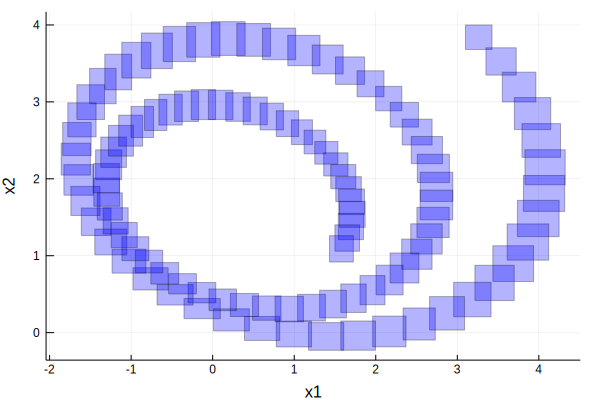

In [92]:
plot([Xkproj[i] for i in 1:1:100], xlab="x1", ylab="x2", alpha=.3)

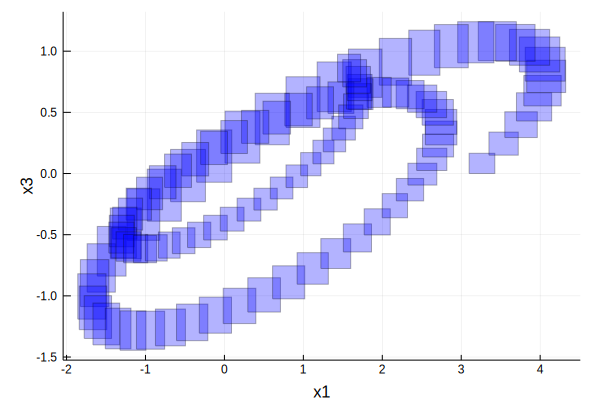

In [93]:
Xkproj = [project(sol.Xk[i].X, [1, 3], Hyperrectangle) for i in eachindex(sol.Xk)];
plot([Xkproj[i] for i in 1:1:100], xlab="x1", ylab="x3", alpha=.3)

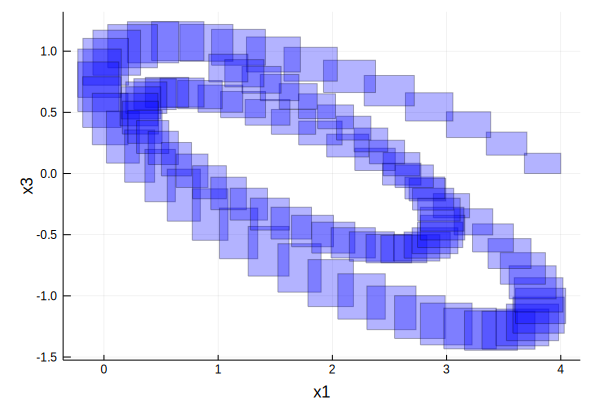

In [94]:
Xkproj = [project(sol.Xk[i].X, [2, 3], Hyperrectangle) for i in eachindex(sol.Xk)];
plot([Xkproj[i] for i in 1:1:100], xlab="x1", ylab="x3", alpha=.3)

In [59]:
using Polyhedra

# using Concrete Discrete Post
@time begin
    opC = BFFPSV18(:δ=>0.01)
    opD = ConcreteDiscretePost()
    sol = solve(problem, options, opC, opD) # does it produce 
end;

Computing successors 100%|██████████████████████████████| Time: 0:00:02


ErrorException: the support function in direction [0.0, 1.0, 0.0, 0.0, 0.0] is undefined because the polytope is unbounded

In [ ]:
Xkproj = [project(sol.Xk[i].X, [2, 3], Hyperrectangle) for i in eachindex(sol.Xk)];
plot(Xkproj, xlab="x1", ylab="x2")

In [ ]:
Xkproj = [project(sol.Xk[i].X, [1, 3], Hyperrectangle) for i in eachindex(sol.Xk)];
plot(Xkproj, xlab="x", ylab="c1")

In [ ]:
Xkproj = [project(sol.Xk[i].X, [1, 2], Hyperrectangle) for i in eachindex(sol.Xk)];
plot(Xkproj, xlab="x", ylab="c1")

In [ ]:
# similar to approximating discrete post ... gives big overapprox error
# with default options
using LazySets.Approximations

@time begin
    opC = BFFPSV18(:δ=>0.1)
    opD = ApproximatingDiscretePost()
    sol = solve(RodReactor, options, opC, opD)
end;

In [ ]:
# similar to approximating discrete post ... gives big overapprox error
# with default options. we try to use oct direction but it doesn't use them
using LazySets.Approximations

@time begin
    opC = BFFPSV18(:δ=>0.1)
    opD = LazyDiscretePost(:check_invariant_intersection=>true,
                           :overapproximation=>OctDirections,
                           :lazy_R⋂I=>false,
                           :lazy_R⋂G=>false,
                           :lazy_A⌜R⋂G⌟⋂I=>false)
    sol = solve(RodReactor, options, opC, opD)
end;

In [ ]:
# using Concrete Discrete Post
@time begin
    opC = BFFPSV18(:δ=>0.01)
    opD = ConcreteDiscretePost()
    sol = solve(RodReactor, options, opC, opD) # does it produce 
end;

In [ ]:
using LazySets.Approximations: project, overapproximate

In [ ]:
Xkproj = [project(sol.Xk[i].X, [1, 3], Hyperrectangle) for i in eachindex(sol.Xk)];
plot(Xkproj, xlab="x", ylab="c2")

In [ ]:
Xkproj = [project(sol.Xk[i].X, [1, 2], Hyperrectangle) for i in eachindex(sol.Xk)];
plot(Xkproj, xlab="x", ylab="c1")